In [108]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [109]:
df = pd.read_csv('data/download_data/sp500_joined_closes.csv')
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()


,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.040546,-0.014514,-0.028988,NaN,NaN,-0.030891,-0.010472,-0.087618,0.000000,NaN,...,NaN,-0.028987,NaN,0.022765,NaN,-0.020305,-0.014533,NaN,-0.049635,NaN
2000-01-05,0.028554,-0.002929,-0.001839,NaN,NaN,0.003913,-0.015915,0.019578,-0.009661,NaN,...,NaN,0.013909,NaN,0.037860,NaN,0.005115,0.018963,NaN,-0.001184,NaN
2000-01-06,0.077358,-0.014771,0.034393,NaN,NaN,-0.019724,0.005333,0.008130,0.013260,NaN,...,NaN,-0.004153,NaN,-0.009331,NaN,-0.008539,-0.055665,NaN,0.014118,NaN
2000-01-07,0.019657,0.040822,0.010619,NaN,NaN,0.027506,0.015831,0.047440,0.022500,NaN,...,NaN,-0.015374,NaN,0.000000,NaN,-0.022551,-0.011160,NaN,0.002333,NaN
2000-01-10,-0.004879,0.011363,-0.007067,NaN,NaN,0.049159,0.000000,0.037883,0.024292,NaN,...,NaN,0.042736,NaN,0.000000,NaN,0.039558,0.033114,NaN,-0.018230,NaN


In [110]:
df = df['2009-07-01':'2019-12-01']
df

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2009-07-01,0.010593,0.044145,-0.008540,NaN,0.008334,0.009456,0.028721,0.012641,-0.002543,0.014358,...,0.006199,0.000733,0.002547,0.019899,NaN,0.049162,0.026690,-0.017284,-0.018333,NaN
2009-07-02,-0.008100,-0.012118,-0.007748,NaN,-0.017943,-0.026223,-0.037350,-0.036238,-0.033658,0.003557,...,-0.023844,-0.022587,-0.057574,-0.025345,NaN,-0.022233,-0.026268,-0.040206,-0.025883,NaN
2009-07-06,0.006946,-0.005965,-0.006069,NaN,-0.000302,-0.018692,0.007882,-0.017519,0.002630,0.002837,...,-0.034202,0.020755,-0.021786,0.013022,NaN,0.017367,-0.000845,0.001243,0.006309,NaN
2009-07-07,-0.031988,-0.038108,-0.014452,NaN,-0.017048,-0.034213,0.017785,-0.030657,-0.027812,-0.014505,...,0.000410,-0.018012,-0.061179,-0.020697,NaN,-0.010094,-0.018349,-0.012997,-0.009932,NaN
2009-07-08,0.004415,-0.009994,0.021169,NaN,0.002453,-0.025797,-0.025666,0.004923,0.018431,0.055893,...,-0.007393,-0.014925,-0.027697,-0.003860,NaN,0.020371,-0.067702,0.007269,-0.006373,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-22,0.014787,-0.005174,0.000717,-0.005447,-0.000610,-0.012180,-0.002338,0.001672,-0.001237,-0.002909,...,-0.000896,0.020171,0.006821,-0.007157,-0.006998,-0.002864,0.003908,0.010485,0.016549,-0.003416
2019-11-25,0.015629,0.011551,0.008916,0.019677,0.008607,0.012925,0.008392,0.019783,0.003237,0.008075,...,0.017604,0.004660,0.039572,-0.007537,-0.003910,0.003987,0.021808,0.008723,0.004195,0.006655
2019-11-26,-0.005950,-0.001437,0.010947,-0.000456,0.012823,0.008156,-0.007690,0.008546,0.008308,-0.013028,...,0.008712,0.000593,-0.019714,0.006230,0.007285,0.017598,-0.004994,-0.001518,-0.010217,0.010557


In [111]:
df.shape

(2623, 503)

<Axes: xlabel='Date'>

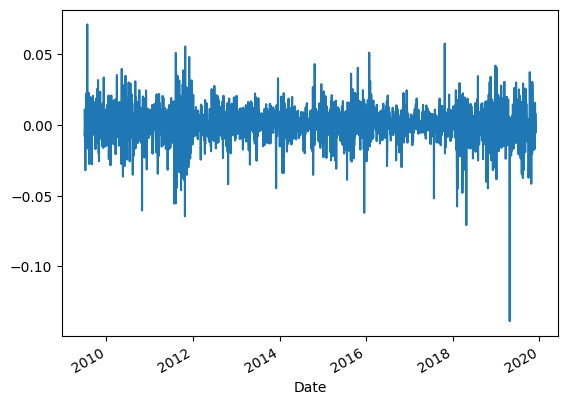

In [112]:
df.MMM.plot()

In [113]:
df.rolling('30d',256 )

Rolling [window=30d,min_periods=256,center=False,axis=0,method=single]

In [114]:
df.rolling('30d',128 )
import numpy as np    
n = 100
matrix = np.zeros((n,2)) # Pre-allocate matrix
for i in range(1,n):
    matrix[i,:] = [3*i, i**2]

In [143]:
n = df.shape[0]
step = 30
length = 256
list(range(0, n, step))
stop = int(n-length)
# for i in range(0, stop, step):
i = 0   
aux = df[i:i+length]
aux = aux.dropna(axis='columns') 
fix_companies = aux.columns

In [145]:
fix_companies

Index(['MMM', 'AOS', 'ABT', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES',
       ...
       'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'YUM', 'ZBRA', 'ZBH',
       'ZION'],
      dtype='object', length=434)

In [146]:
len(fix_companies)

434

In [148]:
2340 + length + step

2626

In [149]:
stop

2367

In [150]:
len(list(range(0, stop, step)))

79

In [151]:
fix_companies = set(fix_companies)


In [152]:
for i,j in zip(range(0, stop, step), range(len(list(range(0, stop, step))))):
    aux = df[i:i+length]
    aux = aux.dropna(axis='columns')
    fix_companies_aux= aux.columns
    fix_companies_aux = set(fix_companies_aux)
    fix_companies = fix_companies.intersection(fix_companies_aux)


In [153]:
fix_companies = list(fix_companies)
len(fix_companies)

434

In [154]:
import pickle
l = list(fix_companies)
with open("fix_companies", "wb") as fp:   #Pickling
    pickle.dump(l, fp)

In [155]:
data = np.empty(( len(list(range(0, stop, step))), length, len(fix_companies)))
data.shape

(79, 256, 434)

In [156]:

for i,j in zip(range(0, stop, step), range(len(list(range(0, stop, step))))):
    aux = df[i:i+length][fix_companies]
    data[j,:,:] = aux.values  


In [157]:
data.shape

(79, 256, 434)

In [158]:
aux.values

array([[ 0.02198572,  0.0083803 ,  0.01762536, ...,  0.0218184 ,
         0.02743387,  0.02453009],
       [-0.00482656, -0.01997975, -0.01112562, ...,  0.00114825,
        -0.01218189, -0.00890476],
       [ 0.00529257,  0.05798725, -0.0163291 , ..., -0.00155851,
        -0.02894613, -0.04700288],
       ...,
       [ 0.0070408 ,  0.02416737, -0.012221  , ...,  0.00210306,
        -0.00179763, -0.01422951],
       [ 0.00395284,  0.00501939,  0.00420615, ...,  0.01209701,
         0.00386776,  0.033406  ],
       [-0.00316126,  0.01413475, -0.00098973, ...,  0.00528241,
        -0.0145117 , -0.01083877]])

In [159]:
data[-1]

array([[ 0.02198572,  0.0083803 ,  0.01762536, ...,  0.0218184 ,
         0.02743387,  0.02453009],
       [-0.00482656, -0.01997975, -0.01112562, ...,  0.00114825,
        -0.01218189, -0.00890476],
       [ 0.00529257,  0.05798725, -0.0163291 , ..., -0.00155851,
        -0.02894613, -0.04700288],
       ...,
       [ 0.0070408 ,  0.02416737, -0.012221  , ...,  0.00210306,
        -0.00179763, -0.01422951],
       [ 0.00395284,  0.00501939,  0.00420615, ...,  0.01209701,
         0.00386776,  0.033406  ],
       [-0.00316126,  0.01413475, -0.00098973, ...,  0.00528241,
        -0.0145117 , -0.01083877]])

train, test = train_test_split(data, test_size=0.2, random_state=42)
print(data.shape, train.shape, test.shape)

In [162]:
np.isnan(data).any()

False

In [163]:
if not os.path.exists('master_data'):
        os.makedirs('master_data')
# np.save('master_data/train.npy', train)
# np.save('master_data/test.npy', test)
np.save('master_data/fix_companies.npy', fix_companies)
np.save('master_data/data.npy', data)